In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_csv('Dataset/Training/Features_Variant_1.csv', header=None)

# drop nan 
df = df.dropna()
# the head of df
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,806.0,11.291045,1.0,70.495138,0.0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
# df to values
df = df.values
Y = df[:,53]
X = df[:,0:53]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(40949, 53, 1)


In [5]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [6]:
x_test.shape

(8190, 53, 1)

In [7]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [8]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [9]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 32759 samples, validate on 8190 samples
Epoch 1/250
32759/32759 [==============================] - 25s 758us/step - loss: 937.1543 - val_loss: 672.0975
Epoch 2/250
32759/32759 [==============================] - 24s 747us/step - loss: 882.5362 - val_loss: 617.5496
Epoch 3/250
32759/32759 [==============================] - 24s 741us/step - loss: 904.3996 - val_loss: 600.4404
Epoch 4/250
32759/32759 [==============================] - 24s 745us/step - loss: 852.2611 - val_loss: 604.3300
Epoch 5/250
32759/32759 [==============================] - 25s 752us/step - loss: 804.2558 - val_loss: 584.9508
Epoch 6/250
32759/32759 [==============================] - 26s 795us/step - loss: 807.2866 - val_loss: 579.3227
Epoch 7/250
32759/32759 [==============================] - 25s 754us/step - loss: 784.3121 - val_loss: 582.6914
Epoch 8/250
32759/32759 [==============================] - 26s 801us/step - loss: 78

32759/32759 [==============================] - 25s 762us/step - loss: 637.8414 - val_loss: 503.4619
Epoch 66/250
32759/32759 [==============================] - 26s 778us/step - loss: 665.8623 - val_loss: 491.9812
Epoch 67/250
32759/32759 [==============================] - 26s 779us/step - loss: 634.0230 - val_loss: 480.2552
Epoch 68/250
32759/32759 [==============================] - 26s 782us/step - loss: 672.9723 - val_loss: 518.2798
Epoch 69/250
32759/32759 [==============================] - 25s 750us/step - loss: 658.8411 - val_loss: 511.0101
Epoch 70/250
32759/32759 [==============================] - 25s 757us/step - loss: 607.7143 - val_loss: 474.2390
Epoch 71/250
32759/32759 [==============================] - 24s 727us/step - loss: 634.6427 - val_loss: 481.9338
Epoch 72/250
32759/32759 [==============================] - 24s 719us/step - loss: 646.7014 - val_loss: 491.8247
Epoch 73/250
32759/32759 [==============================] - 23s 713us/step - loss: 639.2151 - val_loss: 496.2

32759/32759 [==============================] - 23s 716us/step - loss: 611.7133 - val_loss: 512.4880
Epoch 138/250
32759/32759 [==============================] - 25s 757us/step - loss: 632.2266 - val_loss: 487.0707
Epoch 139/250
32759/32759 [==============================] - 24s 742us/step - loss: 607.6132 - val_loss: 494.3509
Epoch 140/250
32759/32759 [==============================] - 24s 736us/step - loss: 649.5681 - val_loss: 499.1220
Epoch 141/250
32759/32759 [==============================] - 24s 725us/step - loss: 610.3677 - val_loss: 490.1659
Epoch 142/250
32759/32759 [==============================] - 25s 755us/step - loss: 646.3110 - val_loss: 496.6762
Epoch 143/250
32759/32759 [==============================] - 23s 713us/step - loss: 600.9812 - val_loss: 494.2375
Epoch 144/250
32759/32759 [==============================] - 24s 735us/step - loss: 650.0853 - val_loss: 470.1539
Epoch 145/250
32759/32759 [==============================] - 23s 716us/step - loss: 650.1509 - val_los

Epoch 209/250
32759/32759 [==============================] - 25s 759us/step - loss: 643.1373 - val_loss: 479.3852
Epoch 210/250
32759/32759 [==============================] - 25s 759us/step - loss: 618.3702 - val_loss: 471.0602
Epoch 211/250
32759/32759 [==============================] - 26s 782us/step - loss: 617.6284 - val_loss: 491.6570
Epoch 212/250
32759/32759 [==============================] - 25s 769us/step - loss: 635.9654 - val_loss: 493.5212
Epoch 213/250
32759/32759 [==============================] - 25s 771us/step - loss: 608.2579 - val_loss: 494.1298
Epoch 214/250
32759/32759 [==============================] - 25s 777us/step - loss: 593.3102 - val_loss: 496.6685
Epoch 215/250
32759/32759 [==============================] - 25s 761us/step - loss: 601.2702 - val_loss: 481.5083
Epoch 216/250
32759/32759 [==============================] - 25s 759us/step - loss: 643.4265 - val_loss: 473.8414
Epoch 217/250
32759/32759 [==============================] - 25s 749us/step - loss: 575.

In [10]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

32759/32759 [==============================] - 2s 61us/step
 Model.evaluate :  507.16678784175167 

Mean Squa Error : 476.4312119519958
Mean Abso Error : 5.278504240003406
Expl. Variance  : 0.5299779777674205


In [11]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 51, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 23, 128)           24704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1408)             

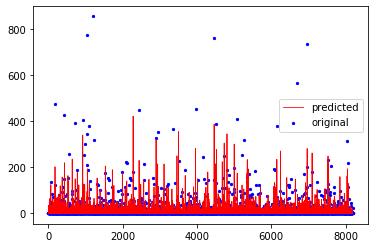

In [12]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

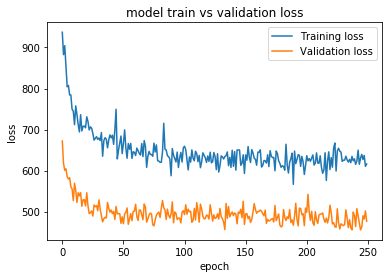

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [14]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [15]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [16]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (32759, 1)
Training Labels (from CNN) Shape: (32759,) 

Test Features (from CNN) Shape: (8190, 1)
Test Labels (from CNN) Shape: (8190,) 

Test Features original Shape: (32759, 53, 1)
Test Features original Shape: (8190, 53, 1)


### Classification by CNN + Random Forest + MLP

In [17]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.0038605946459584904
Optimal # epochs:  230
Optimal batch size:  1638



Epoch: 0001 cost= 0.048620327
Epoch: 0002 cost= 0.002638589
Epoch: 0003 cost= 0.001024238
Epoch: 0004 cost= 0.000752727
Epoch: 0005 cost= 0.000511673
Epoch: 0006 cost= 0.000351653
Epoch: 0007 cost= 0.000243376
Epoch: 0008 cost= 0.000271971
Epoch: 0009 cost= 0.000253271
Epoch: 0010 cost= 0.000234161


Epoch: 0207 cost= 0.000230746
Epoch: 0208 cost= 0.000225892
Epoch: 0209 cost= 0.000246247
Epoch: 0210 cost= 0.000258441
Epoch: 0211 cost= 0.000292382
Epoch: 0212 cost= 0.000222070
Epoch: 0213 cost= 0.000251273
Epoch: 0214 cost= 0.000215686
Epoch: 0215 cost= 0.000248979
Epoch: 0216 cost= 0.000219395
Epoch: 0217 cost= 0.000229384
Epoch: 0218 cost= 0.000240993
Epoch: 0219 cost= 0.000257241
Epoch: 0220 cost= 0.000224969
Epoch: 0221 cost= 0.000237568
Epoch: 0222 cost= 0.000314132
Epoch: 0223 cost= 0.000214663
Epoch: 0224 cost= 0.000293621
Epoch: 0225 cost= 0.000244786
Epoch: 0226 cost= 0.000276911
Epoch: 0227 cost= 0.000247588
Epoch: 0228 cost= 0.000253292
Epoch: 0229 cost= 0.000324183
Epoch: 0230 cost= 0.000198676
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 473.8651747186912
Mean Abso Error : 5.129087168524117
Expl. Variance  : 0.532307735750496 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [18]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 597.127205791192
Mean Abso Error : 4.629251390916035
Expl. Variance  : 0.4164533770442038 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 8.302460572884111e+17
Mean Abso Error : 608001853.2813481
Expl. Variance  : -686438294857347.8 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean Squa

MemoryError: 

In [ ]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

In [ ]:
out_cnn_train.shape

###  MLP

In [ ]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)

### Classification by RandomForest, ExtraTrees, XGBRegressor

In [ ]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [ ]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)